# 逻辑回归解决多分类问题

## OvR(One vs Rest)
> 每次计算一个特征和其他，轮流对每个特征执行这种策略，就完成了多分类问题
![OvR](images/OvR.png)

## OvO(One vs One)
> OvO在sklearn中叫“multinomial", 需要配合使用"newton-cg"作为solver.ovo更加准确，没有混淆其他信息

![OvO](images/OvO.png)

## 代码实战OvR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # 取前2列
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression # sklearn中的LogisticRegression已经内置了OvR和OvO的功能
log_reg = LogisticRegression(multi_class='ovr') # 多分类的核心参数，使用OvR分类
log_reg.fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
log_reg.score(X_test, y_test)

0.6578947368421053

In [6]:
def plot_decision_boundary(model, axis):
    """
    根据模型绘制决策边界
    """
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


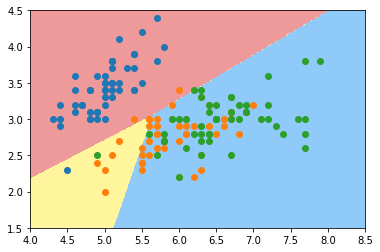

In [7]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show() # 可以看到已经支持了多分类

## 代码实战OvO

In [8]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
log_reg2.score(X_test, y_test) # 正确性明显提高

0.7894736842105263

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


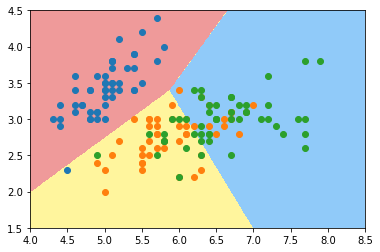

In [10]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show() # 可以看到已经支持了多分类，而且OvO的效果明显比上面的OvR好

## 使用所有的数据，不再只取前两个特征

In [11]:
iris = datasets.load_iris()
X = iris.data # 取全部数据
y = iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 1.使用默认地方法

In [14]:
log_reg = LogisticRegression() # 默认方法，不支持多分类
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9473684210526315

### 2.使用OvO方法

In [15]:
log_reg_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg') # OvO
log_reg_ovo.fit(X_train, y_train)
log_reg_ovo.score(X_test, y_test)

1.0

### 3.使用OvR方法

In [16]:
log_reg_ovr = LogisticRegression(multi_class='ovr') # OvR
log_reg_ovr.fit(X_train, y_train)
log_reg_ovr.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

> 可以看到OvO解决多分类的准确率最高

## 上面是逻辑回归中的OvR和OvO，实际sklearn有单独的类取支持OvO和OvR
> 只要把符合sklearn的机器学习算法对象传入这两个类就可以实现多分类任务

In [19]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(log_reg) # 对默认的对象改成成OvR方式
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [20]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0